In [2]:
#Importing Libraries:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\mojos\OneDrive\Career Foundry Course\Task4 - InstaCart Project\02 Data'

In [5]:
ords_prods_merge = pd.read_pickle(os.path.join(path,'Prepared Data','ords_prods_merge_group_agg_variables.pkl'))

<Axes: xlabel='orders_day_of_week'>

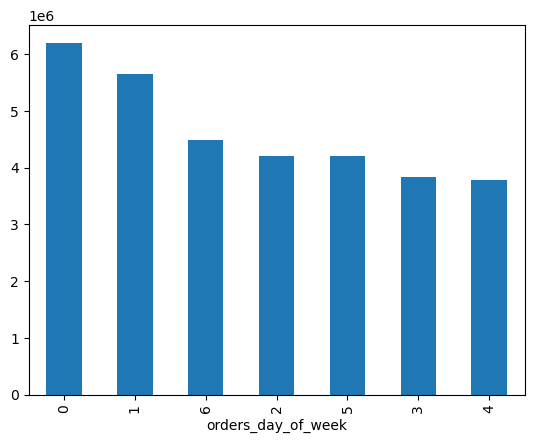

In [10]:
#Bar chart creation:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

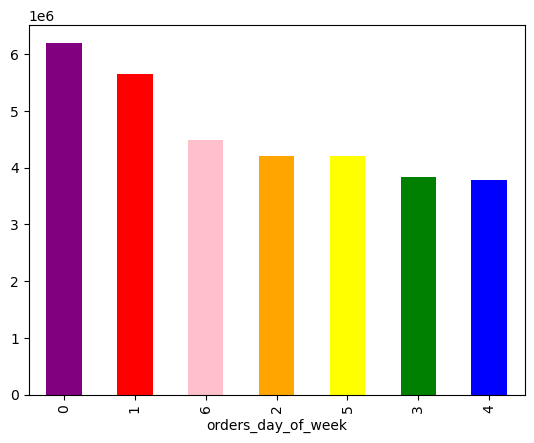

In [31]:
bar2 = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

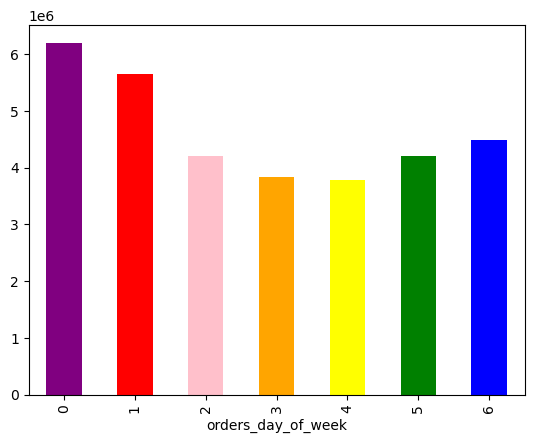

In [17]:
#Same out put, but with the additional sort_index() function to rorganize DOW in order
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [32]:
#Output of the above line was saved as it's own object called 'bar' - This can be exported to .png
bar2.figure.savefig(r'C:\Users\mojos\OneDrive\Career Foundry Course\Task4 - InstaCart Project\04 Analysis\Visualizations\bar2_orders_dow.png')
#Path couldn't be used as it's file location was in a seperate sub-folder

<Axes: ylabel='Frequency'>

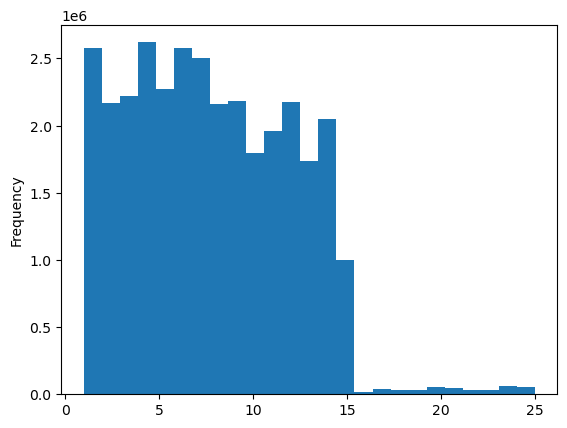

In [28]:
#Histogram Creation(+re-running):
ords_prods_merge['prices'].plot.hist(bins = 25)

In [23]:
#Above output doesn't look right - Data check required:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

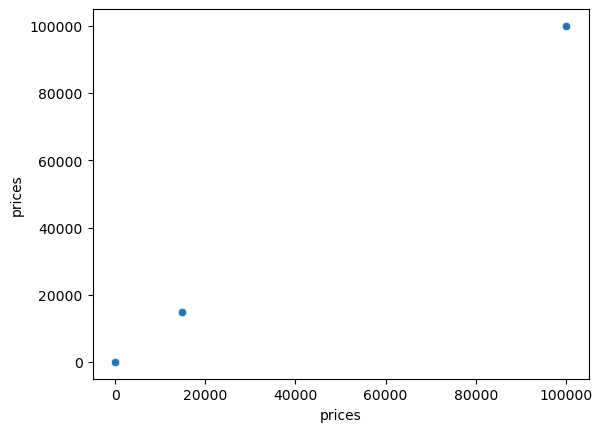

In [24]:
#Scatterplot with seaborn, to help with EDA
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

#### We would expect to see the majority of data points bundled around the '12' value (mean) but because of the scale of the graph due to the 2 outliers, we cannot correctly see the cluster in the lower left corner.

In [25]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,cx_spend_type,order_frequency,cx_order_frequency
10030345,912404,17,prior,12,2,14,5.0,Repeat Customer,21553,5,...,both,High-range product,Regularly busy,Average orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,prior,22,6,16,4.0,Repeat Customer,21553,3,...,both,High-range product,Regularly busy,Average orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,prior,2,2,21,13.0,Repeat Customer,21553,6,...,both,High-range product,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,prior,3,0,8,12.0,Repeat Customer,21553,3,...,both,High-range product,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,prior,8,1,19,30.0,Repeat Customer,21553,9,...,both,High-range product,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,prior,29,0,8,4.0,Repeat Customer,33664,1,...,both,High-range product,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,prior,31,0,9,2.0,Repeat Customer,33664,1,...,both,High-range product,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,prior,13,3,15,8.0,Repeat Customer,33664,25,...,both,High-range product,Slowest Days,Average orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,prior,7,3,20,4.0,Repeat Customer,33664,8,...,both,High-range product,Slowest Days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [26]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [27]:
ords_prods_merge['prices'].max()

25.0

#### Above actions involve reviewing values over 100 that are skewing the data. and using the /loc and Numpy library to update these values to a NaN (missing value) so that they don't impact the analysis - These would need to be taken to the client to recieve an explanation for their appearance in the data.

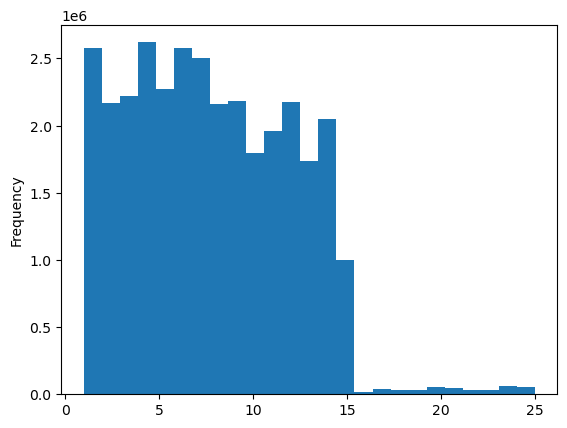

In [29]:
#Exporting histogram:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

In [30]:
hist.figure.savefig(r'C:\Users\mojos\OneDrive\Career Foundry Course\Task4 - InstaCart Project\04 Analysis\Visualizations\hist_prices.png')

### Creating a line graph through the use of data sampling

In [34]:
#the dataframe is too large for the required calculation and plotting (according to CF) and as such, a subset of the data needs to be created
#Using random data sampling at a 70/30 split we can then use 30% of the data to draw some insights that should statistically resemble the larger set.

np.random.seed(4)

#### Creating these samples requires a list of random floating numbers between 0 and 1 (with 1 representing 100 percent of the dataframe) that’s as long as the length of the dataframe. Each row in the dataframe is “assigned” one of these numbers, and then the numbers are compared to a value. In this case, the value is 0.7, since you want a 70/30 split. Any rows whose assigned number is less than 0.7 are placed in one sample, while any rows whose assigned number is greater than 0.7 are placed in the other, effectively splitting the dataframe into two dataframes at a 70/30 ratio.

In [35]:
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [36]:
#Storing everything that is 'dev' (or under 0.7 random value) from the main DF - 70%

big = ords_prods_merge[dev]

In [38]:
#Storing everything that is not 'dev' (30% of DF)
small = ords_prods_merge[~dev]

In [41]:
len(ords_prods_merge)

32404859

In [42]:
len(big) + len(small)

32404859

#### Size of the two new samples combined match the overall DF, so we know the sampe was generated correctly

In [39]:
df_2 = small[['orders_day_of_week','prices']]

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


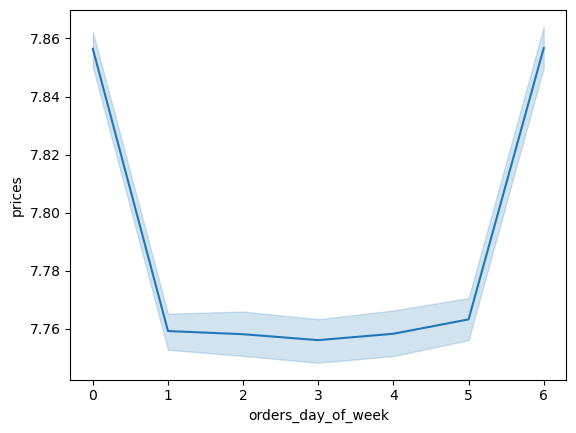

In [43]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [44]:
#exporting line
line.figure.savefig(r'C:\Users\mojos\OneDrive\Career Foundry Course\Task4 - InstaCart Project\04 Analysis\Visualizations\line_dow_prices.png')